# Import package

In [ ]:
!pip install factor-analyzer pandas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler

from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

# Load dataset and preprocessing

In [ ]:
def read_dataset(path):
    df = pd.read_csv(path)
    display(df.head())
    display(df.describe())
    return df

path = '/content/moneyball-training-data.csv'

df = read_dataset(path)

,INDEX,TARGET_WINS,TEAM_BATTING_H,TEAM_BATTING_2B,TEAM_BATTING_3B,TEAM_BATTING_HR,TEAM_BATTING_BB,TEAM_BATTING_SO,TEAM_BASERUN_SB,TEAM_BASERUN_CS,TEAM_BATTING_HBP,TEAM_PITCHING_H,TEAM_PITCHING_HR,TEAM_PITCHING_BB,TEAM_PITCHING_SO,TEAM_FIELDING_E,TEAM_FIELDING_DP
0,1,39,1445,194,39,13,143,842.0,NaN,NaN,NaN,9364,84,927,5456.0,1011,NaN
1,2,70,1339,219,22,190,685,1075.0,37.0,28.0,NaN,1347,191,689,1082.0,193,155.0
2,3,86,1377,232,35,137,602,917.0,46.0,27.0,NaN,1377,137,602,917.0,175,153.0
3,4,70,1387,209,38,96,451,922.0,43.0,30.0,NaN,1396,97,454,928.0,164,156.0
4,5,82,1297,186,27,102,472,920.0,49.0,39.0,NaN,1297,102,472,920.0,138,168.0


,INDEX,TARGET_WINS,TEAM_BATTING_H,TEAM_BATTING_2B,TEAM_BATTING_3B,TEAM_BATTING_HR,TEAM_BATTING_BB,TEAM_BATTING_SO,TEAM_BASERUN_SB,TEAM_BASERUN_CS,TEAM_BATTING_HBP,TEAM_PITCHING_H,TEAM_PITCHING_HR,TEAM_PITCHING_BB,TEAM_PITCHING_SO,TEAM_FIELDING_E,TEAM_FIELDING_DP
count,2276.000000,2276.000000,2276.000000,2276.000000,2276.000000,2276.000000,2276.000000,2174.000000,2145.000000,1504.000000,191.000000,2276.000000,2276.000000,2276.000000,2174.000000,2276.000000,1990.000000
mean,1268.463533,80.790861,1469.269772,241.246924,55.250000,99.612039,501.558875,735.605336,124.761772,52.803856,59.356021,1779.210457,105.698594,553.007909,817.730451,246.480668,146.387940
std,736.349040,15.752152,144.591195,46.801415,27.938557,60.546872,122.670862,248.526418,87.791166,22.956338,12.967123,1406.842930,61.298747,166.357362,553.085031,227.770972,26.226385
min,1.000000,0.000000,891.000000,69.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000,1137.000000,0.000000,0.000000,0.000000,65.000000,52.000000
25%,630.750000,71.000000,1383.000000,208.000000,34.000000,42.000000,451.000000,548.000000,66.000000,38.000000,50.500000,1419.000000,50.000000,476.000000,615.000000,127.000000,131.000000
50%,1270.500000,82.000000,1454.000000,238.000000,47.000000,102.000000,512.000000,750.000000,101.000000,49.000000,58.000000,1518.000000,107.000000,536.500000,813.500000,159.000000,149.000000
75%,1915.500000,92.000000,1537.250000,273.000000,72.000000,147.000000,580.000000,930.000000,156.000000,62.000000,67.000000,1682.500000,150.000000,611.000000,968.000000,249.250000,164.000000
max,2535.000000,146.000000,2554.000000,458.000000,223.000000,264.000000,878.000000,1399.000000,697.000000,201.000000,95.000000,30132.000000,343.000000,3645.000000,19278.000000,1898.000000,228.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2276 entries, 0 to 2275
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   INDEX             2276 non-null   int64  
 1   TARGET_WINS       2276 non-null   int64  
 2   TEAM_BATTING_H    2276 non-null   int64  
 3   TEAM_BATTING_2B   2276 non-null   int64  
 4   TEAM_BATTING_3B   2276 non-null   int64  
 5   TEAM_BATTING_HR   2276 non-null   int64  
 6   TEAM_BATTING_BB   2276 non-null   int64  
 7   TEAM_BATTING_SO   2174 non-null   float64
 8   TEAM_BASERUN_SB   2145 non-null   float64
 9   TEAM_BASERUN_CS   1504 non-null   float64
 10  TEAM_BATTING_HBP  191 non-null    float64
 11  TEAM_PITCHING_H   2276 non-null   int64  
 12  TEAM_PITCHING_HR  2276 non-null   int64  
 13  TEAM_PITCHING_BB  2276 non-null   int64  
 14  TEAM_PITCHING_SO  2174 non-null   float64
 15  TEAM_FIELDING_E   2276 non-null   int64  
 16  TEAM_FIELDING_DP  1990 non-null   float64


In [ ]:
# Sắp xếp các hàng trong DataFrame theo thứ tự tăng dần dựa trên cột 'TARGET_WINS'
df=df.sort_values('TARGET_WINS')

# Chia dữ liệu số thành các nhóm có kích thước bằng nhau dựa trên phân vị
df['WINS_GROUP']=pd.qcut(df['TARGET_WINS'], 3, labels=['1st 33%','2nd 33%','3rd 33%'])

In [ ]:
# Xóa các cột không liên quan và dư thừa
final_df=df.drop(['TEAM_BATTING_HBP', 'INDEX', 'WINS_GROUP', 'TARGET_WINS'], axis=1)

In [ ]:
# Điền các giá trị còn thiếu với giá trị trung bình của mỗi cột
final_df=final_df.fillna(final_df.mean())
result = final_df.columns
result

Index(['TEAM_BATTING_H', 'TEAM_BATTING_2B', 'TEAM_BATTING_3B',
       'TEAM_BATTING_HR', 'TEAM_BATTING_BB', 'TEAM_BATTING_SO',
       'TEAM_BASERUN_SB', 'TEAM_BASERUN_CS', 'TEAM_PITCHING_H',
       'TEAM_PITCHING_HR', 'TEAM_PITCHING_BB', 'TEAM_PITCHING_SO',
       'TEAM_FIELDING_E', 'TEAM_FIELDING_DP'],
      dtype='object')

In [ ]:
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
scaled_baseball=final_df.copy()
scaled_baseball=pd.DataFrame(scaler.fit_transform(scaled_baseball), columns=scaled_baseball.columns)
scaled_baseball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2276 entries, 0 to 2275
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TEAM_BATTING_H    2276 non-null   float64
 1   TEAM_BATTING_2B   2276 non-null   float64
 2   TEAM_BATTING_3B   2276 non-null   float64
 3   TEAM_BATTING_HR   2276 non-null   float64
 4   TEAM_BATTING_BB   2276 non-null   float64
 5   TEAM_BATTING_SO   2276 non-null   float64
 6   TEAM_BASERUN_SB   2276 non-null   float64
 7   TEAM_BASERUN_CS   2276 non-null   float64
 8   TEAM_PITCHING_H   2276 non-null   float64
 9   TEAM_PITCHING_HR  2276 non-null   float64
 10  TEAM_PITCHING_BB  2276 non-null   float64
 11  TEAM_PITCHING_SO  2276 non-null   float64
 12  TEAM_FIELDING_E   2276 non-null   float64
 13  TEAM_FIELDING_DP  2276 non-null   float64
dtypes: float64(14)
memory usage: 249.1 KB


# Kiểm tra tính phù hợp của dữ liệu cho phân tích nhân tố

In [ ]:
# Kiểm định Sphericity của Bartlett
chi_square_value,p_value=calculate_bartlett_sphericity(scaled_baseball)
print("Chi-square value:", chi_square_value, "P-value:", p_value)

# Kiểm định KMO
kmo_all,kmo_model=calculate_kmo(scaled_baseball)
print("KMO model:", kmo_model)

Chi-square value: 25914.007256630215 P-value: 0.0
KMO model: 0.6492818754657947


# Phân tích Nhân Tố Khám Phá (Exploratory Factor Analysis)

In [ ]:
# Khởi tạo Phân tích Nhân Tố
fa = FactorAnalyzer(10, rotation=None)
fa.fit(scaled_baseball)

# Cài đặt của Phân tích Nhân Tố
FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='principal', n_factors=3, rotation=None, rotation_kwargs={},
               use_smc=True)

# Lấy Giá Trị Riêng
ev = fa.get_eigenvalues()
print("Eigenvalues:", ev)

Eigenvalues: (array([4.82803775, 2.16198932, 1.74301502, 1.45229663, 0.95769957,
       0.82668734, 0.60604294, 0.50273078, 0.33357804, 0.19899495,
       0.16015927, 0.12622135, 0.087932  , 0.01461505]), array([ 4.70741905e+00,  2.02484034e+00,  1.66852211e+00,  1.29936239e+00,
        6.74043119e-01,  4.93771668e-01,  2.23842425e-01,  1.33888322e-01,
        9.53247716e-02,  3.84801875e-02,  2.47394589e-03,  8.50007589e-04,
       -1.45336038e-03, -2.44252282e-03]))


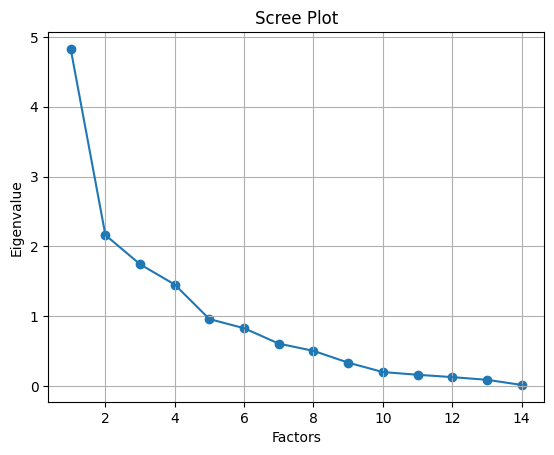

In [ ]:
# Vẽ biểu đồ scree plot
plt.scatter(range(1,scaled_baseball.shape[1]+1),ev[0])
plt.plot(range(1,scaled_baseball.shape[1]+1),ev[0])
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

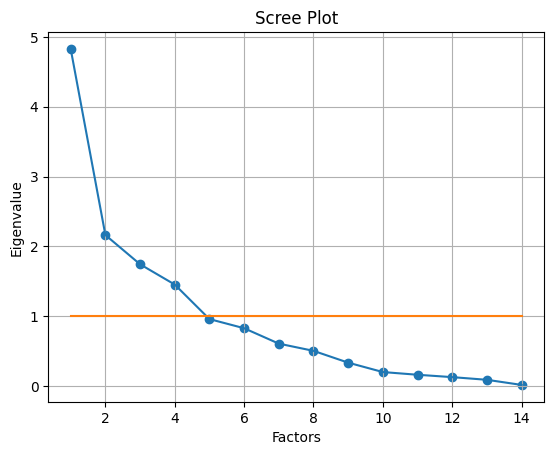

In [ ]:
plt.scatter(range(1,scaled_baseball.shape[1]+1),ev[0])
plt.plot(range(1,scaled_baseball.shape[1]+1),ev[0])
plt.plot(range(1,scaled_baseball.shape[1]+1),np.zeros(shape=(scaled_baseball.shape[1],)) + 1)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [ ]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(4, rotation="varimax", method='principal', use_smc=True)
fa.fit(scaled_baseball)

FactorAnalyzer(method='principal', n_factors=4, rotation='varimax',
               rotation_kwargs={})

In [ ]:
fa.loadings_
loadings = pd.DataFrame(fa.loadings_, columns=['Factor 1', 'Factor 2', 'Factor 3','Factor 4'], index=scaled_baseball.columns)
print('Factor Loadings \n%s' %loadings)

Factor Loadings 
                  Factor 1  Factor 2  Factor 3  Factor 4
TEAM_BATTING_H   -0.302509  0.855875 -0.116007 -0.180324
TEAM_BATTING_2B   0.140487  0.762211  0.089033  0.227272
TEAM_BATTING_3B  -0.386482  0.208646 -0.146040 -0.728201
TEAM_BATTING_HR   0.523187  0.313963  0.179445  0.688820
TEAM_BATTING_BB   0.815919  0.291915  0.274589 -0.029525
TEAM_BATTING_SO   0.573377 -0.242368  0.287742  0.552559
TEAM_BASERUN_SB  -0.057786 -0.071214  0.177390 -0.752188
TEAM_BASERUN_CS   0.133739 -0.104451 -0.027931 -0.539087
TEAM_PITCHING_H  -0.800344  0.173282  0.415141  0.033248
TEAM_PITCHING_HR  0.430821  0.380597  0.244536  0.666450
TEAM_PITCHING_BB  0.106271  0.286256  0.859253 -0.165822
TEAM_PITCHING_SO -0.085084 -0.234543  0.809055  0.256909
TEAM_FIELDING_E  -0.862046 -0.018696  0.048398 -0.283413
TEAM_FIELDING_DP  0.235546  0.444539  0.073292  0.313000


In [ ]:
communalities = fa.get_communalities()
print("Communalities:", communalities)

communalities_df = pd.DataFrame({
    'Column': scaled_baseball.columns,
    'Communality': communalities
})

print(communalities_df)

Communalities: [0.87000801 0.66028097 0.74450541 0.87897115 0.82720953 0.77562057
 0.60566477 0.32019125 0.84402511 0.83441401 0.85904883 0.78282252
 0.82613874 0.35643786]
              Column  Communality
0     TEAM_BATTING_H     0.870008
1    TEAM_BATTING_2B     0.660281
2    TEAM_BATTING_3B     0.744505
3    TEAM_BATTING_HR     0.878971
4    TEAM_BATTING_BB     0.827210
5    TEAM_BATTING_SO     0.775621
6    TEAM_BASERUN_SB     0.605665
7    TEAM_BASERUN_CS     0.320191
8    TEAM_PITCHING_H     0.844025
9   TEAM_PITCHING_HR     0.834414
10  TEAM_PITCHING_BB     0.859049
11  TEAM_PITCHING_SO     0.782823
12   TEAM_FIELDING_E     0.826139
13  TEAM_FIELDING_DP     0.356438


In [ ]:
factor_scores = fa.transform(scaled_baseball)
factor_scores_df = pd.DataFrame(factor_scores, columns=['Factor 1 Score', 'Factor 2 Score', 'Factor 3 Score', 'Factor 4 Score'])

# Hiển thị một vài điểm nhân tố
factor_scores_df

,Factor 1 Score,Factor 2 Score,Factor 3 Score,Factor 4 Score
0,-9.959038,-2.139757,0.914616,4.907042
1,-5.077360,-2.143853,-0.589309,1.333834
2,-6.407939,-0.947358,0.419795,2.327301
3,-5.089928,-1.514551,0.086121,1.793908
4,-1.000424,-1.185605,-1.538006,-0.251078
...,...,...,...,...
2271,-3.403035,2.684214,-1.279130,-0.180019
2272,-2.296015,0.295054,-0.833281,-0.126424
2273,-4.480283,4.148504,-1.134055,0.335955
2274,-1.971764,1.354839,-0.512362,0.583917
